In [29]:
try:
    import os
    import glob
    import numpy as np
    import pandas as pd
    
    # Importing libraries for data visualization
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Creating a model
    from tensorflow.keras.models import Sequential  # type: ignore
    from tensorflow.keras.layers import Dense, Activation  # type: ignore
    
    # Importing libraries for evaluation
    from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
    from sklearn.metrics import classification_report,confusion_matrix

except Exception as e:
    print(f"Error : {e}")

In [30]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [31]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [32]:
# Separate features for encoding
onehot_features = ['microstructure', 'seedLocation', 'castType']
label_features = ['partType']

# Custom transformers
label_encoder = LabelEncoder()
df['partType'] = label_encoder.fit_transform(df['partType'])  # Apply label encoding directly

# Initialize and fit the encoder
encoder = OneHotEncoder(sparse_output=False, drop=None)
# Reshape the data to handle multiple categorical columns
encoded_data = encoder.fit_transform(df[onehot_features].values)

# Convert to DataFrame with feature names
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(onehot_features)
)

# Combine with non-categorical columns if needed
df = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

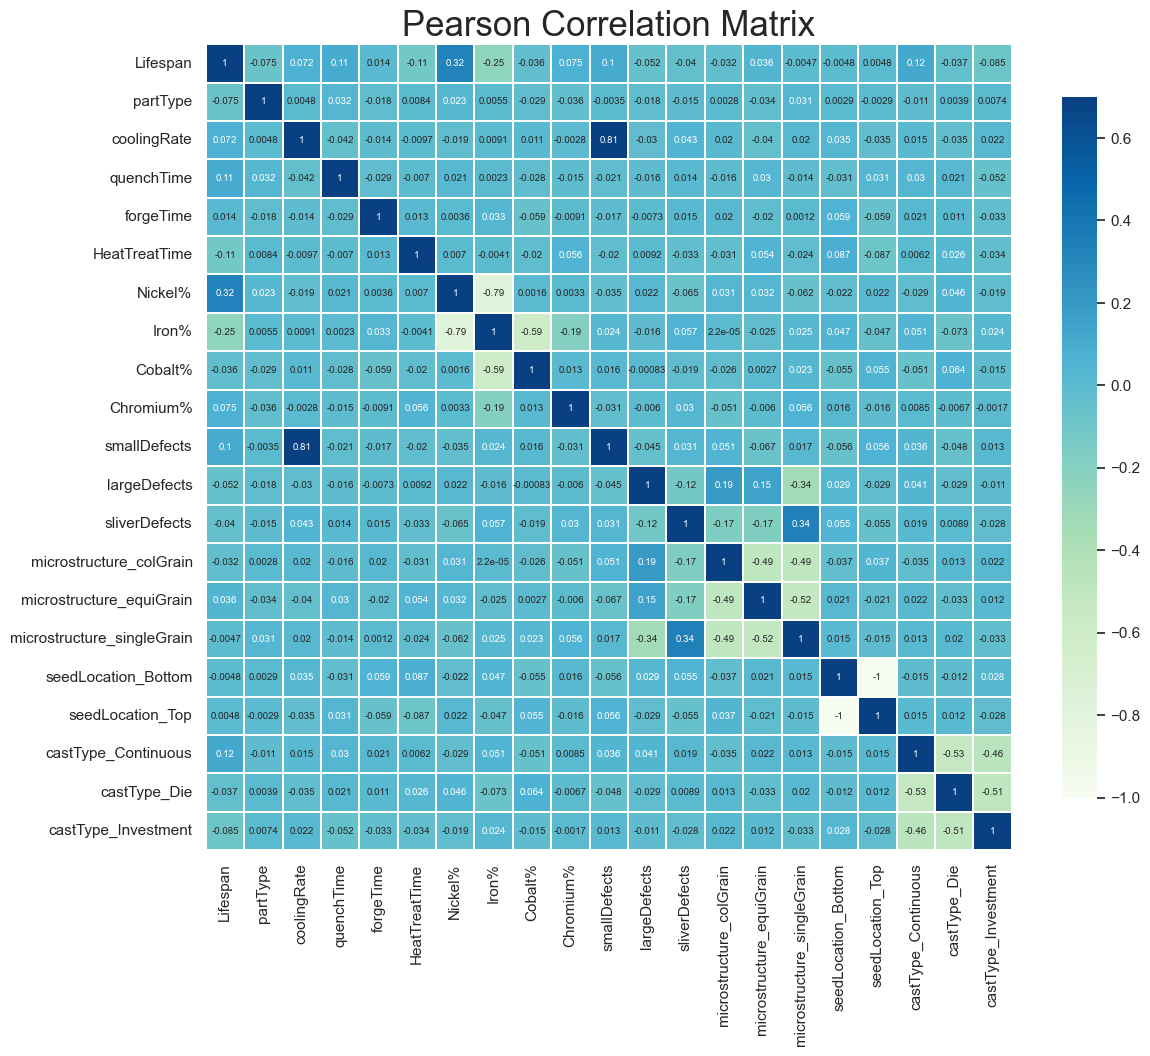

In [33]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})
plt.show()

In [34]:
# Features
X = df.drop('Lifespan',axis=1)

# Target
y = df['Lifespan']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [36]:
# Create the scaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [37]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [38]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1819717.1250 - val_loss: 1776308.8750
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1818149.3750 - val_loss: 1775941.5000
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1807602.6250 - val_loss: 1775473.1250
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1809346.0000 - val_loss: 1774862.8750
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1811562.6250 - val_loss: 1774038.1250
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1837778.2500 - val_loss: 1772888.0000
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1790852.2500 - val_loss: 1771302.3750
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1792075.1250 - val_loss: 1769173.7500
Epoch 9/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1776971.1250 - val_loss: 1766315.2500
Epoch 10/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1808785.5000 - val_loss: 1762454.0000
Epoch 11/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

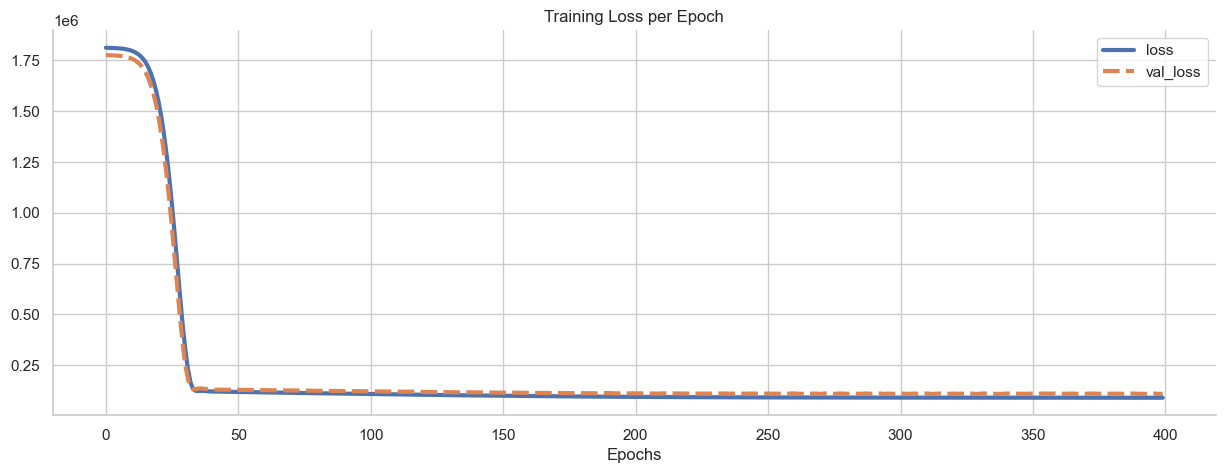

In [39]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()
plt.show()

In [40]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['Lifespan'].describe())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE:  285.6293221679688
MSE:  109671.3507268795
RMSE:  331.1666509884102
Variance Regression Score:  0.1025240246500988


Descriptive Statistics:
 count    1000.000000
mean     1298.556320
std       340.071434
min       417.990000
25%      1047.257500
50%      1266.040000
75%      1563.050000
max      2134.530000
Name: Lifespan, dtype: float64


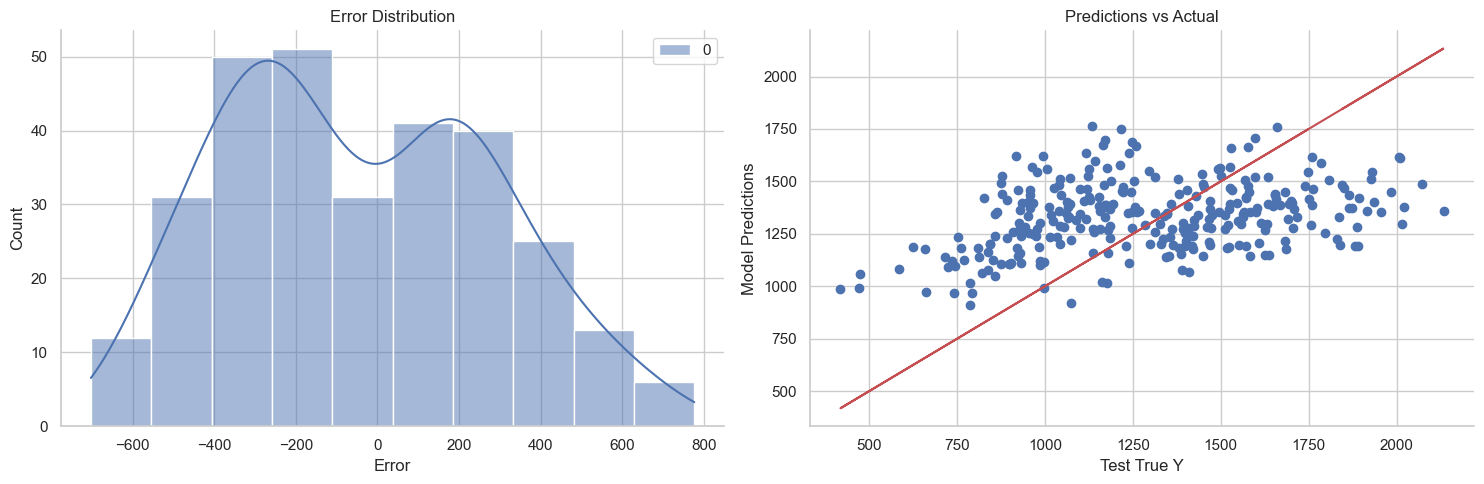

In [41]:
f, axes = plt.subplots(1, 2, figsize=(15,5))

# Plot 1: Error Distribution
errors = y_test.values.reshape(300, 1) - predictions
sns.histplot(errors, ax=axes[0], kde=True)  # Using histplot instead of distplot as distplot is deprecated
axes[0].set(xlabel='Error', ylabel='Count', title='Error Distribution')

# Plot 2: Predictions vs Actual
axes[1].scatter(y_test, predictions)
axes[1].plot(y_test, y_test, 'r')  # Perfect predictions line
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Predictions vs Actual')

sns.despine()
plt.tight_layout()
plt.show()

In [42]:
# Get features of new part type
single_partType = df.drop('Lifespan', axis=1).iloc[0]
print(f'Features of new part type:\n{single_partType}')

# Convert to DataFrame with feature names
single_partType_df = pd.DataFrame([single_partType.values], columns=single_partType.index)

# Scale the features while preserving feature names
single_partType_scaled = scaler.transform(single_partType_df)

# Run the model and get the lifespan prediction
print('\nPrediction Lifespan:', model.predict(single_partType_scaled)[0,0])

# Print original lifespan
print('\nOriginal Lifespan:', df.iloc[0]['Lifespan'])

Features of new part type:
partType                       2.00
coolingRate                   13.00
quenchTime                     3.84
forgeTime                      6.47
HeatTreatTime                 46.87
Nickel%                       65.73
Iron%                         16.52
Cobalt%                       16.82
Chromium%                      0.93
smallDefects                  10.00
largeDefects                   0.00
sliverDefects                  0.00
microstructure_colGrain        0.00
microstructure_equiGrain       1.00
microstructure_singleGrain     0.00
seedLocation_Bottom            1.00
seedLocation_Top               0.00
castType_Continuous            0.00
castType_Die                   1.00
castType_Investment            0.00
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Prediction Lifespan: 1368.4972

Original Lifespan: 1469.17
